In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
boston_dataset = datasets.load_boston()
boston_pd = pd.DataFrame(boston_dataset.data)
boston_pd.columns = boston_dataset.feature_names
boston_pd_target = np.asarray(boston_dataset.target)
boston_pd['House Price'] = pd.Series(boston_pd_target)
boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,House Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
X=boston_pd.iloc[:, :-1]
Y=boston_pd.iloc[:,-1]

In [8]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [9]:
Y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: House Price, Length: 506, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [11]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((379, 13), (127, 13), (379,), (127,))

In [12]:
lreg = LinearRegression()
lreg.fit(x_train, y_train)

LinearRegression()

In [13]:
lreg_y_pred = lreg.predict(x_test)

In [14]:
mean_squared_error = np.mean((lreg_y_pred-y_test)**2)
print('Mean Squared Error on the test set: ', mean_squared_error)

Mean Squared Error on the test set:  31.72473771912862


In [15]:
# Putting together the coefficient and their corresponding variable names
lreg_coefficient = pd.DataFrame()
lreg_coefficient['Columns'] = x_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lreg.coef_)
print(lreg_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.069959
1        ZN              0.038795
2     INDUS              0.001458
3      CHAS              2.950323
4       NOX            -16.676004
5        RM              4.511951
6       AGE             -0.016636
7       DIS             -1.359707
8       RAD              0.228963
9       TAX             -0.010537
10  PTRATIO             -1.003478
11        B              0.008788
12    LSTAT             -0.416617


<Axes: xlabel='Coefficient Estimate', ylabel='Columns'>

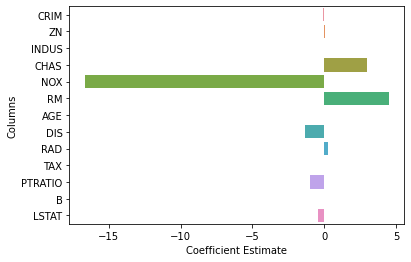

In [16]:
import seaborn as sns
sns.barplot(x = 'Coefficient Estimate', y='Columns', data = lreg_coefficient)

In [18]:
from sklearn.linear_model import Ridge

# Train
ridgeR = Ridge(alpha=1)
ridgeR.fit(x_train, y_train)
y_pred = ridgeR.predict(x_test)

# calculate mean square error
mean_squared_error_ridge = np.mean((y_pred - y_test)**2)
print(mean_squared_error_ridge)

31.99444562861482


In [21]:
ridge_coefficient = pd.DataFrame()
ridge_coefficient['Columns'] = x_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridgeR.coef_)
print(ridge_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.065955
1        ZN              0.038831
2     INDUS             -0.028354
3      CHAS              2.812921
4       NOX             -8.903679
5        RM              4.528177
6       AGE             -0.023276
7       DIS             -1.238647
8       RAD              0.208395
9       TAX             -0.011075
10  PTRATIO             -0.923432
11        B              0.008996
12    LSTAT             -0.430648


In [20]:
from sklearn.linear_model import Lasso

# Train
lasso = Lasso(alpha=1)
lasso.fit(x_train, y_train)
y_pred1 = lasso.predict(x_test)

# calculate mean square error
mean_squared_error = np.mean((y_pred - y_test)**2)
print(mean_squared_error)

31.99444562861482


In [22]:
lasso_coefficient = pd.DataFrame()
lasso_coefficient['Columns'] = x_train.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(lasso.coef_)
print(lasso_coefficient)

    Columns  Coefficient Estimate
0      CRIM             -0.049452
1        ZN              0.041260
2     INDUS             -0.000000
3      CHAS              0.000000
4       NOX             -0.000000
5        RM              1.487233
6       AGE              0.005767
7       DIS             -0.635593
8       RAD              0.220444
9       TAX             -0.014249
10  PTRATIO             -0.823234
11        B              0.006379
12    LSTAT             -0.688836
